# Lab 12

In [35]:
import networkx as nx
import numpy as np
import pandas as pd
import random

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib.animation as anim
from tqdm.notebook import tqdm

from utils.plotting import set_white_ticks, pretty_draw, draw_degree_histogram, get_context_for_dark_IDE

%matplotlib inline
SEED_SRC = 42
random.seed(SEED_SRC)
np.random.seed(SEED_SRC)

In [36]:
trolls = pd.read_csv('../data/twitter/users.csv')
print(trolls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                392 non-null    float64
 1   location          284 non-null    object 
 2   name              383 non-null    object 
 3   followers_count   383 non-null    float64
 4   statuses_count    383 non-null    float64
 5   time_zone         368 non-null    object 
 6   verified          383 non-null    object 
 7   lang              383 non-null    object 
 8   screen_name       453 non-null    object 
 9   description       338 non-null    object 
 10  created_at        383 non-null    object 
 11  favourites_count  383 non-null    float64
 12  friends_count     383 non-null    float64
 13  listed_count      383 non-null    float64
dtypes: float64(6), object(8)
memory usage: 49.7+ KB
None


In [37]:
trolls = trolls.dropna(subset=['id'])

In [38]:
tweets = pd.read_csv('../data/twitter/tweets.csv')
print(tweets.info())
print(tweets.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203451 entries, 0 to 203450
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                195386 non-null  float64
 1   user_key               203451 non-null  object 
 2   created_at             203430 non-null  float64
 3   created_str            203430 non-null  object 
 4   retweet_count          58052 non-null   float64
 5   retweeted              58052 non-null   object 
 6   favorite_count         58052 non-null   float64
 7   text                   203430 non-null  object 
 8   tweet_id               201137 non-null  float64
 9   source                 58053 non-null   object 
 10  hashtags               203451 non-null  object 
 11  expanded_urls          203451 non-null  object 
 12  posted                 203451 non-null  object 
 13  mentions               203451 non-null  object 
 14  retweeted_status_id    39649 non-nul

In [39]:
tweets = tweets.dropna(subset=['user_id'])
tweets['created'] = pd.to_datetime(tweets['created_str'], format='%Y-%m-%d %H:%M:%S')


In [40]:
tweets.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 195386 entries, 0 to 203450
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                195386 non-null  float64       
 1   user_key               195386 non-null  object        
 2   created_at             195365 non-null  float64       
 3   created_str            195365 non-null  object        
 4   retweet_count          58052 non-null   float64       
 5   retweeted              58052 non-null   object        
 6   favorite_count         58052 non-null   float64       
 7   text                   195365 non-null  object        
 8   tweet_id               193214 non-null  float64       
 9   source                 58053 non-null   object        
 10  hashtags               195386 non-null  object        
 11  expanded_urls          195386 non-null  object        
 12  posted                 195386 non-null  obje

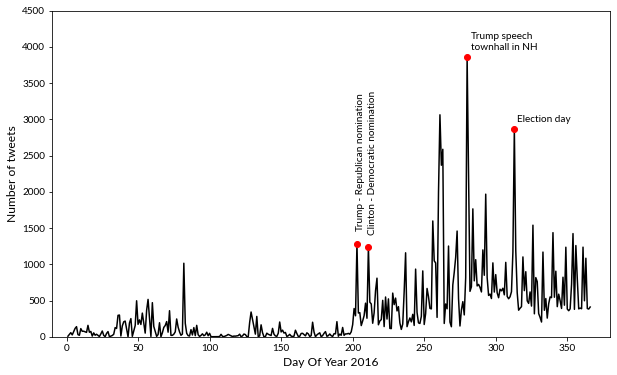

In [53]:
rcParams['font.family'] = 'Lato'
created_hist = tweets[tweets['created'].dt.year == 2016].groupby(tweets['created'].dt.dayofyear).count()['user_id']
#with get_context_for_dark_IDE():
plt.figure(figsize=(10,6))
plt.plot(created_hist, 'k-')
plt.xlabel('Day Of Year 2016', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
trump_nomination_day = pd.Period('2016-07-21', freq='D').dayofyear
plt.plot([trump_nomination_day], created_hist[trump_nomination_day], 'ro')
plt.annotate('Trump - Republican nomination', xy=(trump_nomination_day,created_hist[trump_nomination_day]),
             xytext=(trump_nomination_day-1,created_hist[trump_nomination_day] + 200),
             rotation=90)

clinton_nomination_day = pd.Period('2016-07-29', freq='D').dayofyear
plt.plot([clinton_nomination_day], created_hist[clinton_nomination_day], 'ro')
plt.annotate('Clinton - Democratic nomination', xy=(clinton_nomination_day,created_hist[clinton_nomination_day]),
             xytext=(clinton_nomination_day,created_hist[clinton_nomination_day] + 200),
             rotation=90)

nh_trump_day = pd.Period('2016-10-06', freq='D').dayofyear
plt.plot([nh_trump_day], created_hist[nh_trump_day], 'ro')
plt.annotate('Trump speech \ntownhall in NH', xy=(nh_trump_day,created_hist[nh_trump_day]),
             xytext=(nh_trump_day + 3,created_hist[nh_trump_day] + 100))

election_day = pd.Period('2016-11-08', freq='D').dayofyear
plt.plot([election_day], created_hist[election_day], 'ro')
plt.annotate('Election day', xy=(election_day,created_hist[election_day]),
             xytext=(election_day + 2,created_hist[election_day] + 100))
plt.ylim(0, 4_500)
plt.xlim(-10, 380)
plt.savefig('../images/year.svg', transparent=True)


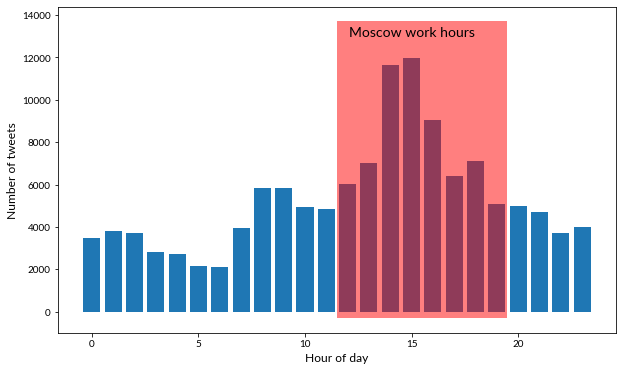

In [54]:
created_hist = tweets[tweets['created'].dt.year == 2016].groupby(tweets['created'].dt.hour).count()
#with get_context_for_dark_IDE():
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(created_hist.index, created_hist['user_id'])
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
rc = Rectangle((11.5,-300), 8, 14_000, alpha=0.5, facecolor='red')
ax.add_patch(rc)
plt.text(15, 13_000, 'Moscow work hours', horizontalalignment='center', fontsize=14)
plt.savefig('../images/day.svg', transparent=True)


In [43]:
content_df = pd.read_csv('../data/twitter/content_type.csv')
print(content_df.info())
print(content_df.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   screen_name      413 non-null    object
 1   totalTweets      413 non-null    int64 
 2   totalRetweets    413 non-null    int64 
 3   totalReplies     413 non-null    int64 
 4   originalContent  413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
None
        screen_name  totalTweets  totalRetweets  totalReplies  originalContent
0     AmelieBaldwin         9262           6092             0             3170
1           hyddrox         6809           3628             0             3181
2       GiselleEvns         6593            444             1             6148
3      PatriotBlake         4138            988             0             3150
4    TheFoundingSon         3571             71            52             3448
5    MelvinSRoberts         3340            179    

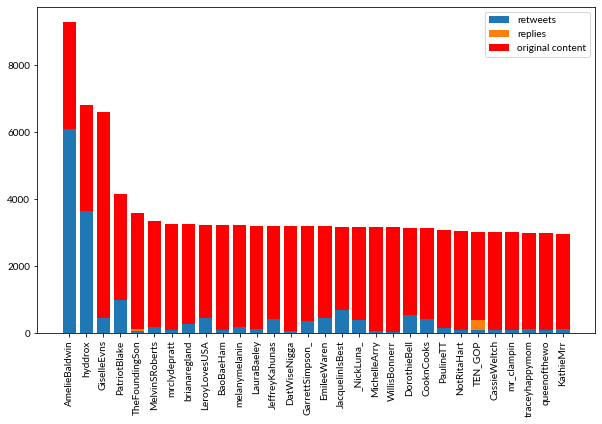

In [44]:
with get_context_for_dark_IDE():
    DF = content_df[:30]
    plt.figure(figsize=(10,6))
    plt.bar(DF['screen_name'], DF['totalRetweets'], label='retweets')
    plt.bar(DF['screen_name'], DF['totalReplies'], bottom=DF['totalRetweets'], label='replies')
    plt.bar(DF['screen_name'], DF['originalContent'], bottom=DF['totalRetweets']+DF['totalReplies'], color='red', label='original content')
    plt.xticks(rotation=90)
    plt.legend()

In [45]:
replies_df = content_df[['screen_name', 'totalReplies']].sort_values(by='totalReplies', ascending=False)
print(replies_df.head(20))

         screen_name  totalReplies
24           TEN_GOP           309
4     TheFoundingSon            52
69    USA_Gunslinger            44
65       Jenn_Abrams            42
111        redlanews            21
214        WarfareWW            12
126     Luke_Jones13            10
35        EvaGreen69             8
107      BlackToLive             8
176      SCOTTGOHARD             8
110      RealTEN_GOP             6
237      PigeonToday             6
53    Pamela_Moore13             4
154  March_for_Trump             4
93     SouthLoneStar             3
142     todayinsyria             2
224  BlackNewsOutlet             2
364         zubovnik             2
193      Beckster319             2
188        Blk_Voice             2


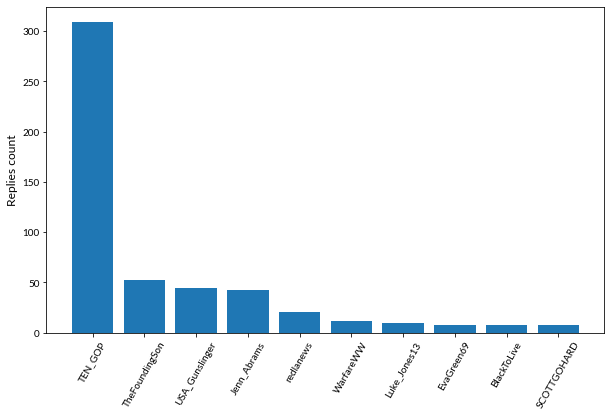

In [46]:
with get_context_for_dark_IDE():
    DF = replies_df[:10]
    plt.figure(figsize=(10,6))
    plt.bar(DF['screen_name'], DF['totalReplies'])
    plt.xticks(rotation=60)
    plt.ylabel('Replies count', fontsize=12)

In [47]:
retweets = pd.read_csv('../data/twitter/user_retweets.csv')
retweets = retweets.dropna()
retweets_G = nx.from_pandas_edgelist(retweets, source='source', target='target')

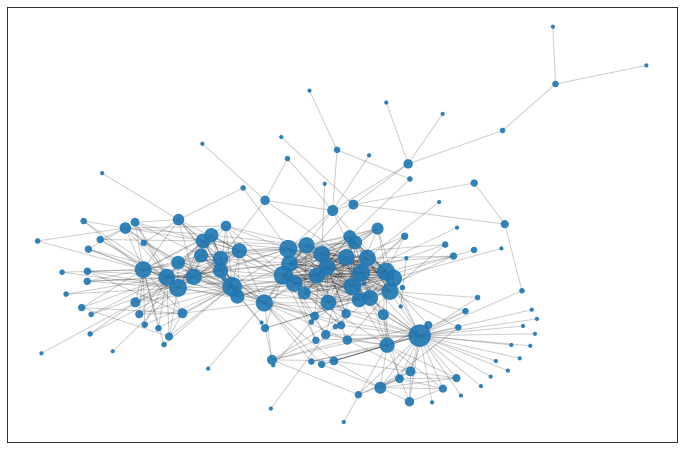

In [48]:
with get_context_for_dark_IDE():
    pretty_draw(retweets_G)

In [49]:
def random_color():
    return [x/256 for x in list(np.random.choice(range(0, 128), size=3))]

comm = nx.algorithms.community.label_propagation_communities(retweets_G)
communities = pd.DataFrame(columns=['nodeId', 'communityId', 'color'])
comm_id = 0
for c in comm:
    color = random_color()
    for v in c:
        communities = communities.append({'nodeId': v, 'communityId':comm_id, 'color': color}, ignore_index=True)
    comm_id += 1
print(communities)

           nodeId communityId                                color
0    4.840552e+09           0    [0.3984375, 0.19921875, 0.359375]
1    1.518857e+09           0    [0.3984375, 0.19921875, 0.359375]
2    1.675281e+09           0    [0.3984375, 0.19921875, 0.359375]
3    1.655288e+09           1   [0.0546875, 0.4140625, 0.27734375]
4    1.655194e+09           1   [0.0546875, 0.4140625, 0.27734375]
..            ...         ...                                  ...
137  1.859674e+09          16  [0.23828125, 0.23828125, 0.1796875]
138  4.859142e+09          16  [0.23828125, 0.23828125, 0.1796875]
139  1.653554e+09          17  [0.23828125, 0.1953125, 0.41796875]
140  1.768260e+09          17  [0.23828125, 0.1953125, 0.41796875]
141  3.978317e+09          17  [0.23828125, 0.1953125, 0.41796875]

[142 rows x 3 columns]


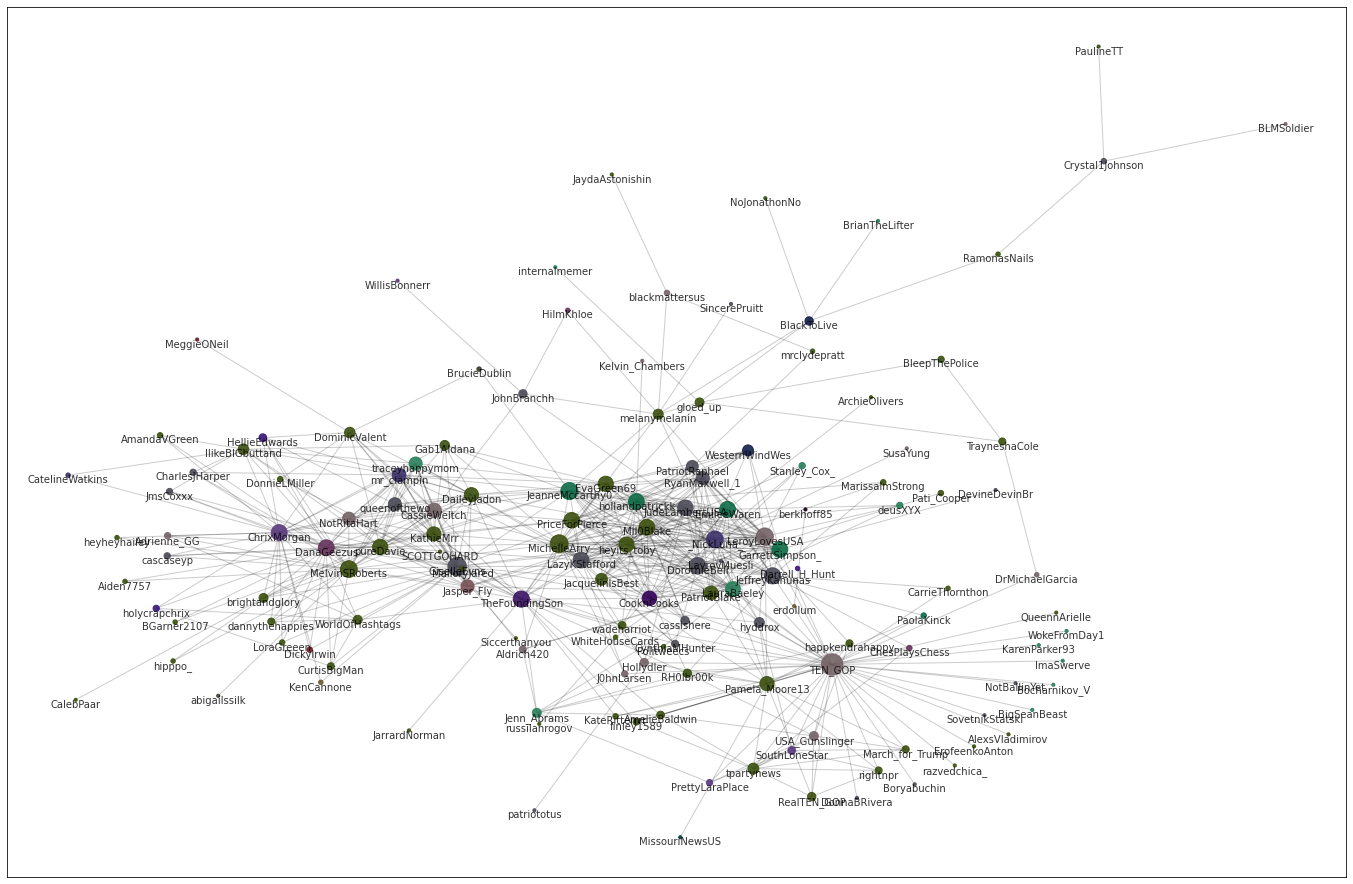

In [50]:
communities = communities.sort_values(by='nodeId')
fig, ax = plt.subplots(figsize=(24, 16))
dgrs = dict(retweets_G.degree)
pos = nx.kamada_kawai_layout(retweets_G)
nx.draw_networkx_nodes(retweets_G, pos=pos, ax=ax, node_size=[v * 10 for v in dgrs.values()], alpha=0.9,
                       node_color=communities['color'])
nx.draw_networkx_edges(retweets_G, pos=pos, ax=ax, alpha=0.2)
nx.draw_networkx_labels(retweets_G, pos=pos, labels={v:trolls[trolls['id']==int(v)]['screen_name'].to_numpy()[0] for v in retweets_G.nodes}, font_size=10, verticalalignment='top', alpha=0.8)
plt.savefig('../images/user_retweets.svg')
plt.show()

In [51]:
trolls[trolls['id']==1518857420]['name'].to_numpy()[0]

'Jonathon Norwood'